# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Running this not notebook
This notebook was run using docker image https://hub.docker.com/r/tensorflow/tensorflow/tags/ 1.0.1-py3 on windows 7. You need to run the steps in sub chapter "Install python modules".

### Run on windows
1. start virtual box ubuntu image
1. open shell
1. run in shell: @FOR /f "tokens=*" %i IN ('docker-machine env --shell cmd') DO @%i
1. run in shell: docker run -it -p 8888:8888 -v //carnd:/notebooks/carnd gcr.io/tensorflow/tensorflow:1.0.1-py3

### Install python modules
1. open shell
1. run in shell: @FOR /f "tokens=*" %i IN ('docker-machine env --shell cmd') DO @%i
1. run in shell: docker container ls
1. run in shell (explace containerid with real container id): docker exec -i -t containerid /bin/bash
1. run in container shall: python -m pip install keras tqdm scikit-image opencv-python

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

training_file = "../traffic-signs-data/train.p"
validation_file= "../traffic-signs-data/valid.p"
testing_file = "../traffic-signs-data/test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [2]:
import numpy as np
from functools import reduce

### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# Number of training examples
n_train = len(X_train)

# Number of validation examples
n_validation = len(X_valid)

# Number of testing examples.
n_test = len(X_test)

# What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# How many unique classes/labels there are in the dataset.
n_classes = len(np.unique(reduce(np.union1d, (np.unique(y_train), np.unique(y_valid), np.unique(y_test)))))

print("Number of training examples =", n_train)
print("Number of validation examples =", n_validation)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of validation examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


In [3]:
labels = np.arange(n_classes)

### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

In [4]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

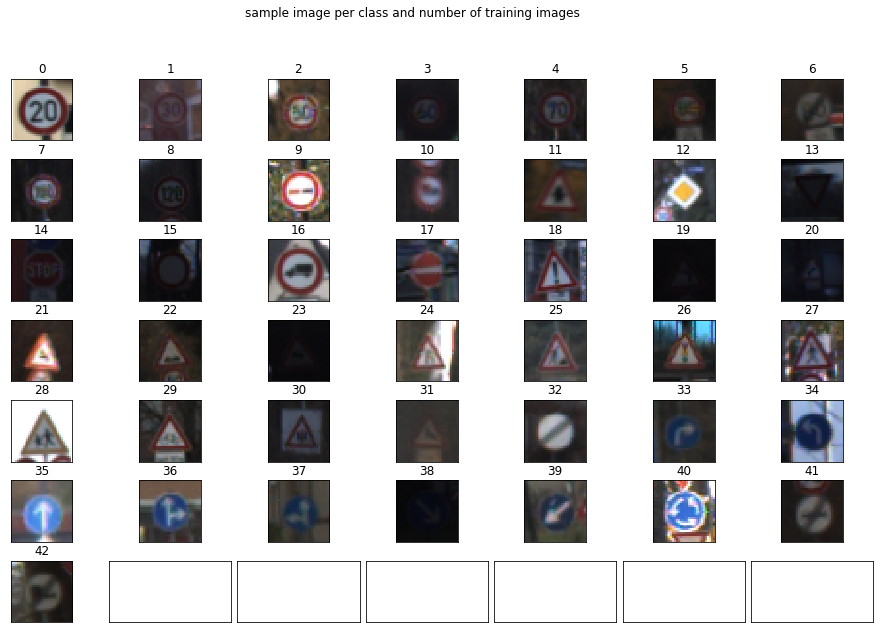

In [5]:
import math

### plot a grid with sample image per class
def plot_sample_per_class(x_list, y_list):
    train_counts = np.bincount(y_list)
    
    samples = []
    for label in labels:
        for x, y in zip(x_list, y_list):
            if y == label:
                samples.append([x,y])
                break
    
    grid_cols = 7
    grid_rows = math.ceil(n_classes/grid_cols)
    fig, axes = plt.subplots(grid_rows, grid_cols, figsize=(16, 10),
                             subplot_kw={'xticks': [], 'yticks': []})

    fig.suptitle('sample image per class and number of training images')
    fig.subplots_adjust(hspace=0.3, wspace=0.05)

    for ax, sample in zip(axes.flat, samples):
        ax.imshow(sample[0])
        #ax.set_title("" + str(sample[1]) + ": " + (train_counts[sample[1]])
        ax.set_title(sample[1])

    plt.show()
    
    
plot_sample_per_class(X_train, y_train)

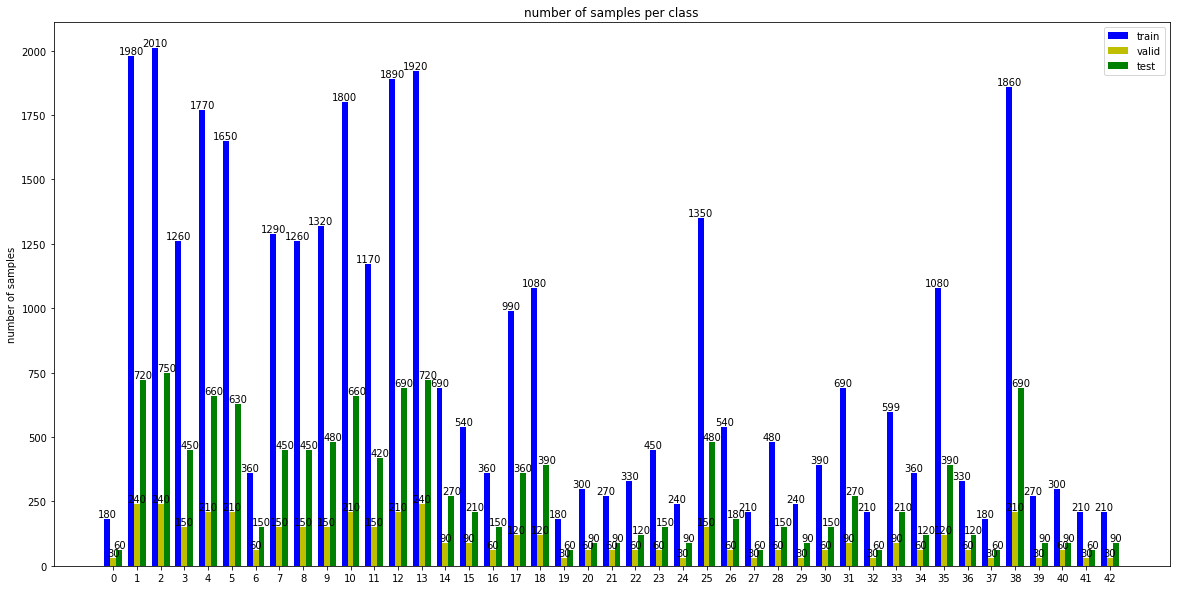

In [6]:
### plot bar chart with number of train, test, validation samples per class
def plot_class_numbers():
    groups_x = np.arange(n_classes)
    bar_width = 0.25

    fig, ax = plt.subplots(figsize=(20, 10))
    
    rects1 = ax.bar(groups_x, np.bincount(y_train), bar_width, color='b')
    rects2 = ax.bar(groups_x + bar_width, np.bincount(y_valid), bar_width, color='y')
    rects3 = ax.bar(groups_x + bar_width*2, np.bincount(y_test), bar_width, color='g')

    # add some text for labels, title and axes ticks
    ax.set_ylabel('number of samples')
    ax.set_title('number of samples per class')
    ax.set_xticks(groups_x + bar_width)
    ax.set_xticklabels(labels)

    ax.legend((rects1[0], rects2[0], rects3[0]), ('train', 'valid', 'test'))

    def autolabel(rects):
        """
        Attach a text label above each bar displaying its height
        """
        for rect in rects:
            height = rect.get_height()
            ax.text(rect.get_x() + rect.get_width()/2., height,
                    '%d' % int(height),
                    ha='center', va='bottom')

    autolabel(rects1)
    autolabel(rects2)
    autolabel(rects3)

    plt.show()

plot_class_numbers()

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [7]:
def save_checkpoint(file, var):
    print('Saving checkpoint variables to cache file...')
    try:
        dirname = os.path.dirname(file)
        if not os.path.exists(dirname):
            os.makedirs(dirname)
        with open(file, 'wb') as pfile:
            pickle.dump(var, pfile, pickle.HIGHEST_PROTOCOL)
    except Exception as e:
        print('Unable to save checkpoint variables to', file, ':', e)
        raise
    print('Checkpoint variables saved in cache file.')

In [8]:
def load_checkpoint(file):
    with open(file, 'rb') as pfile:
        checkpoint = pickle.load(pfile)
        for key in checkpoint:
            exec("global " + key + "; " + key + " = checkpoint['" + str(key) + "']")
            print(key + " = checkpoint['" + str(key) + "']")
        del checkpoint

In [9]:
from tqdm import tqdm
import warnings
from skimage import exposure

def normalize_images(images):
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        images_equalized = np.array([exposure.equalize_adapthist(image, clip_limit=0.03) for image in tqdm(images, desc = 'normalize images')])
        return images_equalized


In [10]:
### Normalize pixel values in train, validation and test image sets.
import os

checkpoint1_var = {}
checkpoint1_file = 'data/checkpoint1.p'
checkpoint1_force = False

if not os.path.isfile(checkpoint1_file) or checkpoint1_force:
    print('normalizing training images...')
    checkpoint1_var['X_train_normalized'] = normalize_images(X_train)
    print("normalized " + str(len(checkpoint1_var['X_train_normalized'])) + " train samples")
    checkpoint1_var['y_train'] = y_train
    
    print('\nnormalizing validation images...')
    checkpoint1_var['X_valid_normalized'] = normalize_images(X_valid)
    checkpoint1_var['y_valid'] = y_valid
    
    print('\nnormalizing test Images...')
    checkpoint1_var['X_test_normalized'] = normalize_images(X_test)
    checkpoint1_var['y_test'] = y_test
    
    save_checkpoint(checkpoint1_file, checkpoint1_var)

else:
    print('Checkpoint Already Exists. Data will be loaded from checkpoint. Set checkpoint1_force to force new file.')


Checkpoint Already Exists. Data will be loaded from checkpoint. Set checkpoint1_force to force new file.


In [11]:
### Load normalized data sets and delete unnormalized data sets to prevent using them later and to save memory.
try:
    del X_train
except:
    pass
try:
    del X_valid
except:
    pass
try:
    del X_test
except:
    pass
load_checkpoint(checkpoint1_file)

X_valid_normalized = checkpoint['X_valid_normalized']
y_valid = checkpoint['y_valid']
y_test = checkpoint['y_test']
X_train_normalized = checkpoint['X_train_normalized']
y_train = checkpoint['y_train']
X_test_normalized = checkpoint['X_test_normalized']


In [12]:
# report stats on loaded checkpoint
print("loaded " + str(len(X_train_normalized)) + " normalized train samples")
print("loaded " + str(len(y_train)) + " train labels")
print("loaded " + str(len(X_valid_normalized)) + " normalized validation samples")
print("loaded " + str(len(y_valid)) + " validation labels")
print("loaded " + str(len(X_test_normalized)) + " normalized test samples")
print("loaded " + str(len(y_test)) + " test labels")


loaded 34799 normalized train samples
loaded 34799 train labels
loaded 4410 normalized validation samples
loaded 4410 validation labels
loaded 12630 normalized test samples
loaded 12630 test labels


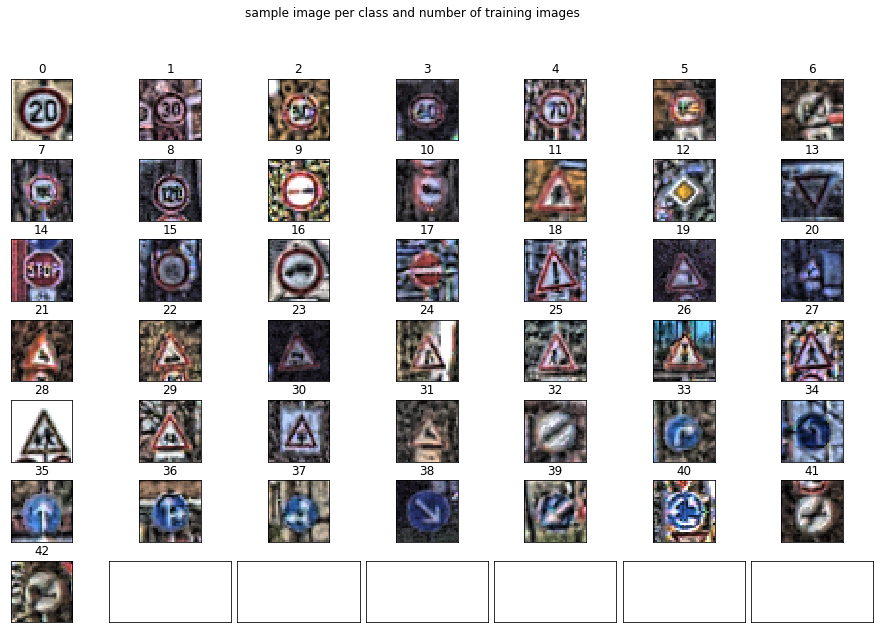

In [13]:
plot_sample_per_class(X_train_normalized, y_train)

In [14]:
### increase training data set
from keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
from tqdm import tqdm
from sklearn.utils import shuffle

checkpoint2_var = {}
checkpoint2_file = 'data/checkpoint2.p'
checkpoint2_force = False

X_train_synth = np.empty((0,32,32,3))
y_train_synth = np.empty(0,dtype='uint8')

if not os.path.isfile(checkpoint2_file) or checkpoint2_force:
    print('augmenting image data...')
    
    img_data_gen = ImageDataGenerator(
        rotation_range=8,
        width_shift_range=0.1,
        height_shift_range=0.1,
        shear_range=0.1,
        zoom_range=0.1,
        fill_mode='nearest',
        horizontal_flip=False,
        vertical_flip=False
    )

    class_image_count = 5000
    
    for i in tqdm(range(n_classes)):
        X_i = X_train_normalized[y_train==i]
        y_i = y_train[y_train==i]
        
        X_augmented_i = np.copy(X_i)
        y_augmented_i = np.copy(y_i)
        
        if (len(y_i) > 0):
            for X,y in img_data_gen.flow(X_i, y_i, batch_size=128, seed=10779+i*42):            
                X_augmented_i = np.append(X_augmented_i, X, axis=0)
                y_augmented_i = np.append(y_augmented_i, y, axis=0)

                if len(X_augmented_i) >= class_image_count:
                    break

        X_train_synth = np.append(X_train_synth, X_augmented_i[:class_image_count], axis=0)
        y_train_synth = np.append(y_train_synth, y_augmented_i[:class_image_count], axis=0)
        
    
    X_train_synth, y_train_synth = shuffle(X_train_synth, y_train_synth, random_state=10779)
    
    checkpoint2_var['X_train_synth'] = X_train_synth
    checkpoint2_var['y_train_synth'] = y_train_synth
    
    save_checkpoint(checkpoint2_file, checkpoint2_var)
    
else:
    print('Pickle file already created. Set checkpoint2_force to force new file.')

Using TensorFlow backend.


Pickle file already created. Set checkpoint2_force to force new file.


In [15]:
### load augmented training data set
try:
    del X_train_normalized
except:
    pass
try:
    del y_train
except:
    pass
load_checkpoint(checkpoint2_file)

X_train_synth = checkpoint['X_train_synth']
y_train_synth = checkpoint['y_train_synth']


In [16]:
# report stats on loaded checkpoint
print("loaded " + str(len(X_train_synth)) + " augmented train samples")
print("loaded " + str(len(y_train_synth)) + " augmented train labels")

loaded 215000 augmented train samples
loaded 215000 augmented train labels


### Model Architecture

In [17]:
### hyper parameters
BATCH_SIZE = 128
TRAIN_SIZE = len(y_train_synth)
EPOCHS = 10
LEARNING_RATE = 0.001
DROPOUP_KEEP = 0.7
MODEL_NAME = "letnet-3"

train_force = True

In [18]:
import tensorflow as tf

### input and expected output placeholders
x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)
dropout_keep = tf.placeholder(tf.float32)

In [19]:
### Define your architecture here.
### Feel free to use as many code cells as needed.
conv1 = None
conv2 = None
def create_model(x):
    global conv1, conv2
    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    # Layer 1: Convolutional. Input = 32x32x3. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 3, 6), mean = mu, stddev = sigma), name = 'conv1_W')
    conv1_b = tf.Variable(tf.zeros(6), name = 'conv1_b')
    x_normalized = tf.map_fn(lambda img: tf.image.per_image_standardization(img), x)
    conv1 = tf.nn.conv2d(x_normalized, conv1_W, [1,1,1,1], 'VALID')
    conv1 = tf.nn.bias_add(conv1, conv1_b)
    conv1 = tf.nn.relu(conv1)
    conv1 = tf.nn.dropout(conv1, dropout_keep)

    # Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1_pooled = tf.nn.max_pool(conv1, [1,2,2,1], [1,2,2,1], 'VALID')

    # Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal((5,5,6,16), mean = mu, stddev = sigma), name = 'conv2_W')
    conv2_b = tf.Variable(tf.zeros(16), name = 'conv2_b')
    conv2 = tf.nn.conv2d(conv1_pooled, conv2_W, [1,1,1,1], 'VALID')
    conv2 = tf.nn.bias_add(conv2, conv2_b)
    conv2 = tf.nn.relu(conv2)
    conv2 = tf.nn.dropout(conv2, dropout_keep)

    # Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2_pooled = tf.nn.max_pool(conv2, [1,2,2,1], [1,2,2,1], 'VALID')

    # Flatten. Input = 5x5x16. Output = 400.
    conv2_pooled_flattened = tf.contrib.layers.flatten(conv2_pooled)
    
    # Layer 3: Fully Connected. Input = 400. Output = 120.
    full3_W = tf.Variable(tf.truncated_normal((400, 120), mean = mu, stddev = sigma), name = 'full3_W')
    full3_b = tf.Variable(tf.zeros(120), name = 'full3_b')
    full3 = tf.matmul(conv2_pooled_flattened, full3_W) + full3_b
    full3 = tf.nn.relu(full3)
    full3 = tf.nn.dropout(full3, dropout_keep)

    # Layer 4: Fully Connected. Input = 120. Output = 84.
    full4_W = tf.Variable(tf.truncated_normal((120, 84), mean = mu, stddev = sigma), name = 'full4_W')
    full4_b = tf.Variable(tf.zeros(84), name = 'full4_b')
    full4 = tf.matmul(full3, full4_W) + full4_b
    full4 = tf.nn.relu(full4)
    full4 = tf.nn.dropout(full4, dropout_keep)

    # Layer 5: Fully Connected. Input = 84. Output = 43.
    full5_W = tf.Variable(tf.truncated_normal((84, 43), mean = mu, stddev = sigma), name = 'full5_W')
    full5_b = tf.Variable(tf.zeros(43), name = 'full5_W')
    full5 = tf.matmul(full4, full5_W) + full5_b
    full5 = tf.nn.dropout(full5, dropout_keep)
    
    return full5

### create the model
logits = create_model(x)

In [20]:
### operations for evaluating model
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [21]:
### for saving and loading the model
saver = tf.train.Saver()

In [22]:
### determine accuracy of model using given data
def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, dropout_keep: 1.0})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

In [23]:
### train model and constantly determine validation accuracy in every epoch
from sklearn.utils import shuffle
from tqdm import tqdm, tnrange, tqdm_notebook

def train_model(logits, _x_train, _y_train, _x_valid, _y_valid):
    cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
    loss_operation = tf.reduce_mean(cross_entropy)
    optimizer = tf.train.AdamOptimizer(learning_rate = LEARNING_RATE)
    training_operation = optimizer.minimize(loss_operation)
    
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        num_examples = len(_x_train)

        for i in tnrange(EPOCHS, desc = "Training " + str(EPOCHS) + " epochs"):
            _x_train, _y_train = shuffle(_x_train, _y_train)
            for offset in tqdm(range(0, num_examples, BATCH_SIZE), desc = "EPOCH {} ...".format(i+1)):
                end = offset + BATCH_SIZE
                batch_x, batch_y = _x_train[offset:end], _y_train[offset:end]
                sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, dropout_keep: DROPOUP_KEEP})

            train_accuracy = evaluate(_x_train, _y_train)
            tqdm.write("Training Accuracy = {:.3f}".format(train_accuracy))
            
            validation_accuracy = evaluate(_x_valid, _y_valid)
            tqdm.write("Validation Accuracy = {:.3f}".format(validation_accuracy))

        path = saver.save(sess, './' + MODEL_NAME)
        print("Model saved to " + path)

In [24]:
### train model
if not os.path.isfile('./' + MODEL_NAME + '.meta') or train_force:
    train_model(logits, _x_train = X_train_synth[:TRAIN_SIZE], _y_train = y_train_synth[:TRAIN_SIZE], _x_valid = X_valid_normalized, _y_valid = y_valid)

Widget Javascript not detected.  It may not be installed or enabled properly.


EPOCH 1 ...: 100%|██████████| 1680/1680 [03:03<00:00,  9.84it/s]


Training Accuracy = 0.831
Validation Accuracy = 0.817


EPOCH 2 ...: 100%|██████████| 1680/1680 [03:05<00:00,  9.07it/s]


Training Accuracy = 0.909
Validation Accuracy = 0.901


EPOCH 3 ...: 100%|██████████| 1680/1680 [03:02<00:00,  9.19it/s]


Training Accuracy = 0.925
Validation Accuracy = 0.915


EPOCH 4 ...: 100%|██████████| 1680/1680 [03:05<00:00,  9.07it/s]


Training Accuracy = 0.945
Validation Accuracy = 0.935


EPOCH 5 ...: 100%|██████████| 1680/1680 [03:01<00:00,  9.24it/s]


Training Accuracy = 0.947
Validation Accuracy = 0.933


EPOCH 6 ...: 100%|██████████| 1680/1680 [03:02<00:00,  9.88it/s]


Training Accuracy = 0.951
Validation Accuracy = 0.942


EPOCH 7 ...: 100%|██████████| 1680/1680 [03:02<00:00, 10.01it/s]


Training Accuracy = 0.954
Validation Accuracy = 0.940


EPOCH 8 ...: 100%|██████████| 1680/1680 [03:02<00:00,  9.20it/s]


Training Accuracy = 0.960
Validation Accuracy = 0.942


EPOCH 9 ...: 100%|██████████| 1680/1680 [03:02<00:00,  9.21it/s]


Training Accuracy = 0.959
Validation Accuracy = 0.945


EPOCH 10 ...: 100%|██████████| 1680/1680 [03:02<00:00,  9.21it/s]


Training Accuracy = 0.966
Validation Accuracy = 0.949

Model saved to ./letnet-3


In [25]:
### determine accuracy against test set (run once model architecture is done)
def test_accuracy():
    with tf.Session() as sess:
        saver.restore(sess, './' + MODEL_NAME)
        test_accuracy = evaluate(X_test_normalized, y_test)
        print("Test Accuracy = {:.3f}".format(test_accuracy))

test_accuracy()

INFO:tensorflow:Restoring parameters from ./letnet-3
Test Accuracy = 0.937


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

In [26]:
### load sign names
import pandas as pd
signs = pd.read_csv('./signnames.csv', names = ['class_id', 'sign_name'], index_col = 'class_id')

def get_label_name(label_id):
    return str(label_id) + ': ' + signs.loc[str(label_id)]['sign_name']

print(get_label_name(0))

0: Speed limit (20km/h)


### Load and Output the Images

In [27]:
#### load some test images from GTSRB data set
# prerequisite: download and extract images 
# wget http://benchmark.ini.rub.de/Dataset/GTSRB_Final_Training_Images.zip
# in parent folder of carnd project dir: unzip GTSRB_Final_Training_Images.zip
from PIL import Image
import numpy as np
import scipy.misc

def load_ppm(file):
    image = Image.open(file).convert('RGB')
    image = scipy.misc.imresize(image, (32,32,3))
    return np.array(image, np.uint8)

test_image_labels = np.array([0, 1, 2, 3, 4])
test_images = []
test_images.append(load_ppm('./../GTSRB/Final_Training/Images/00000/00000_00000.ppm'))
test_images.append(load_ppm('./../GTSRB/Final_Training/Images/00001/00001_00000.ppm'))
test_images.append(load_ppm('./../GTSRB/Final_Training/Images/00002/00002_00000.ppm'))
test_images.append(load_ppm('./../GTSRB/Final_Training/Images/00003/00003_00000.ppm'))
test_images.append(load_ppm('./../GTSRB/Final_Training/Images/00004/00004_00000.ppm'))

test_images_normalized = normalize_images(test_images)

normalize images: 100%|██████████| 5/5 [00:00<00:00, 92.29it/s]


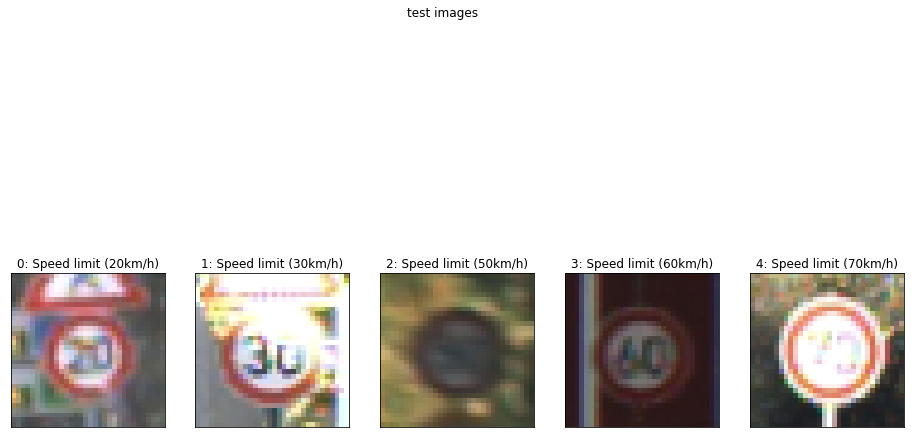

In [28]:
import math

### Plot images
def plot_images(images, labels):
    grid_cols = 5
    grid_rows = math.ceil(len(images)/grid_cols)
    fig, axes = plt.subplots(grid_rows, grid_cols, figsize=(16, 10), subplot_kw={'xticks': [], 'yticks': []})
    fig.suptitle('test images')

    for ax, image, label in zip(axes.flat, images, labels):
        ax.imshow(image)
        ax.set_title(get_label_name(label))

    plt.show()

plot_images(test_images, test_image_labels)

### Predict the Sign Type for Each Image

In [29]:
### load model
saver2 = tf.train.import_meta_graph('./' + MODEL_NAME + '.meta')

INFO:tensorflow:Restoring parameters from ./letnet-3


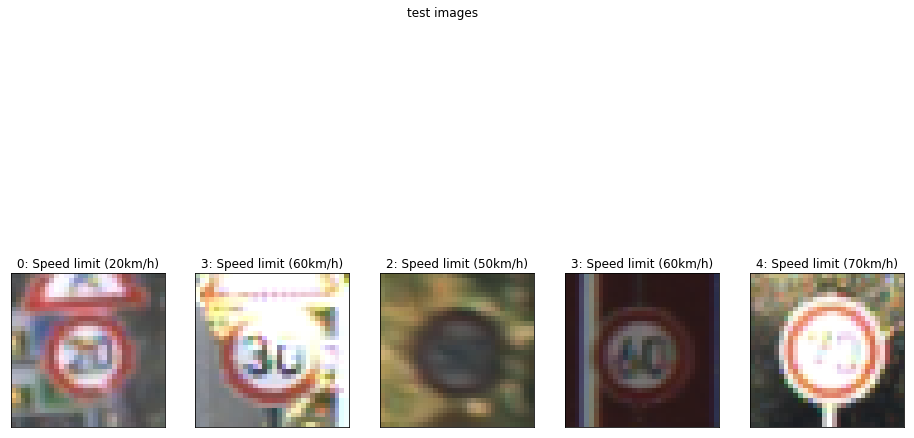

In [30]:
### Run the predictions and plot images and showing predictions as image label
with tf.Session() as sess:
    saver2.restore(sess, tf.train.latest_checkpoint('./'))
    prediction_operation = tf.argmax(logits, 1)
    predicted_image_labels = sess.run(prediction_operation, feed_dict={x: test_images_normalized, dropout_keep: 1.0})
    plot_images(test_images, predicted_image_labels)

### Analyze Performance

In [31]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.
with tf.Session() as sess:
    saver2.restore(sess, tf.train.latest_checkpoint('./'))
    print("Accuracy for the new images:", end = '')
    print(evaluate(test_images_normalized, test_image_labels))

INFO:tensorflow:Restoring parameters from ./letnet-3
Accuracy for the new images:0.800000011921


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

INFO:tensorflow:Restoring parameters from ./letnet-3



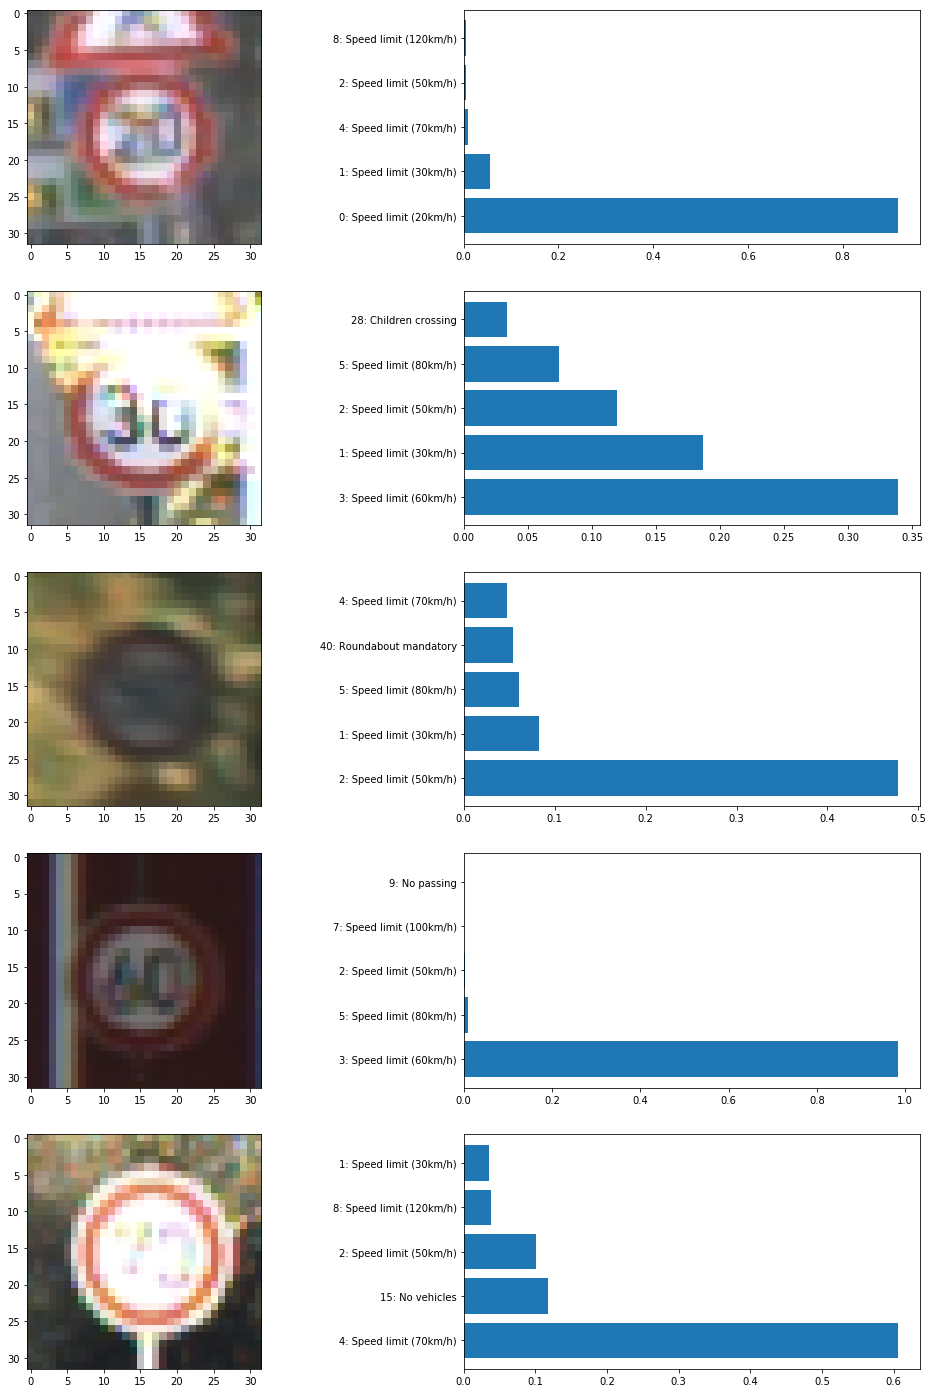

In [32]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
with tf.Session() as sess:
    saver2.restore(sess, tf.train.latest_checkpoint('./'))
    test_image_results = sess.run(logits, feed_dict={x: test_images_normalized, dropout_keep: 1.0})
    
    plt.figure(figsize=(18,25))
    for i in range(len(test_images)):
        logits_result = tf.placeholder(tf.float32, (None))
        topk = tf.nn.top_k(tf.nn.softmax(logits_result), k = 5)
        topkvalues = sess.run(topk, feed_dict={logits_result: test_image_results[i]})
        plt.subplot(len(test_images),2,(i+1)*2 -1)
        plt.imshow(test_images[i])

        plt.subplot(len(test_images),2,(i+1)*2)
        plt.barh(range(5), topkvalues.values, align='center')
        plt.yticks(range(5) ,[get_label_name(idx) for idx in topkvalues.indices])
    
    print()

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [33]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, name, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input, dropout_keep: 1.0})
    featuremaps = activation.shape[3]
    fig = plt.figure(plt_num, figsize=(15,15))
    fig.suptitle(name)
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")
    plt.show()

INFO:tensorflow:Restoring parameters from ./letnet-3


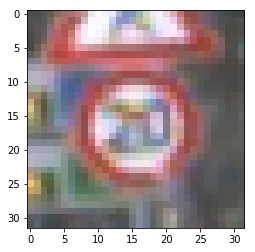

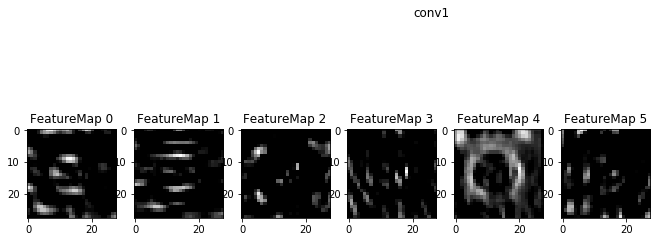

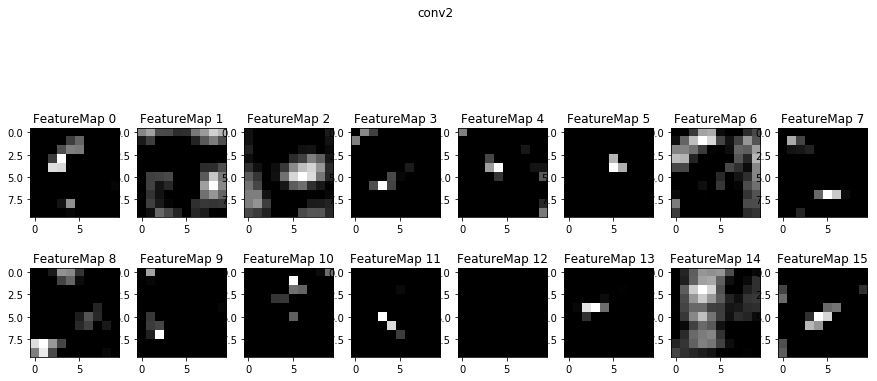

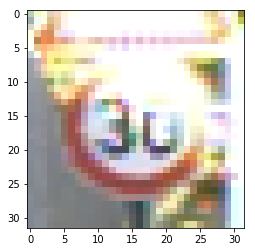

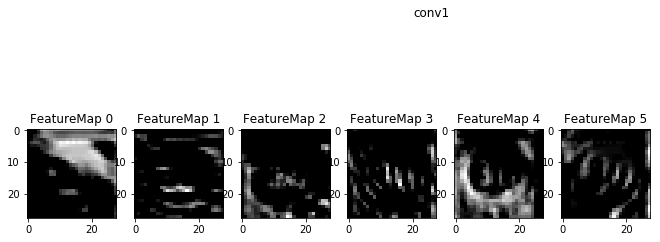

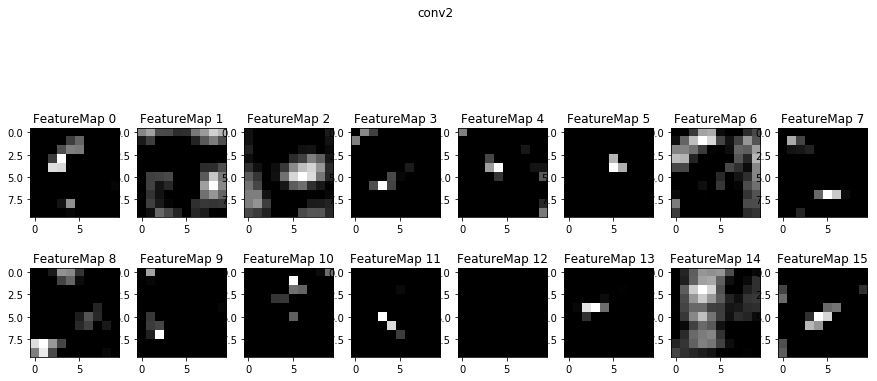

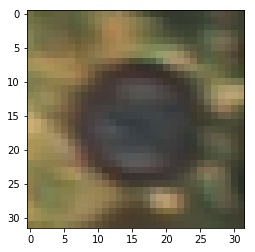

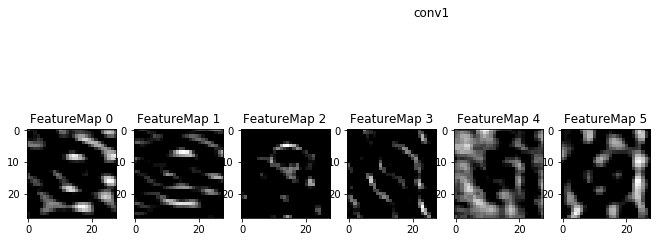

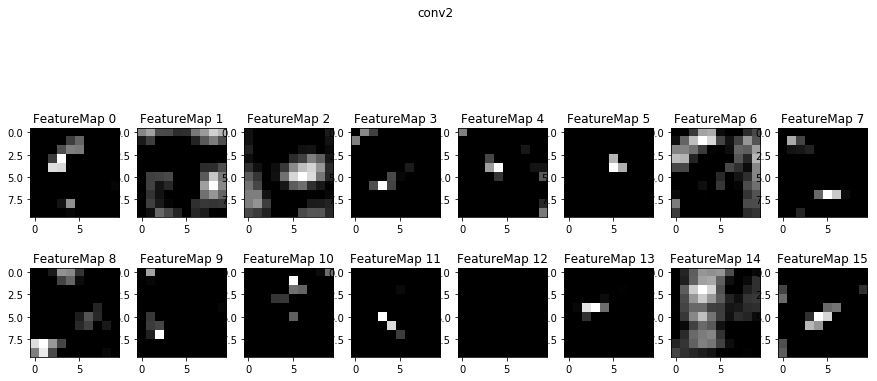

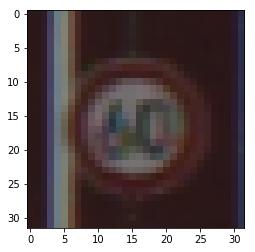

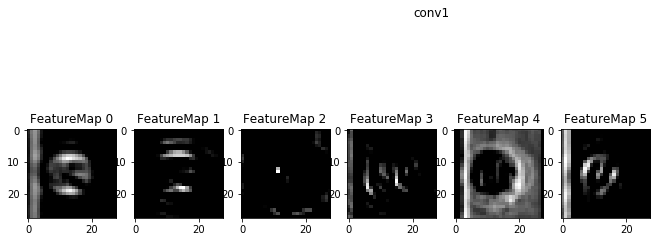

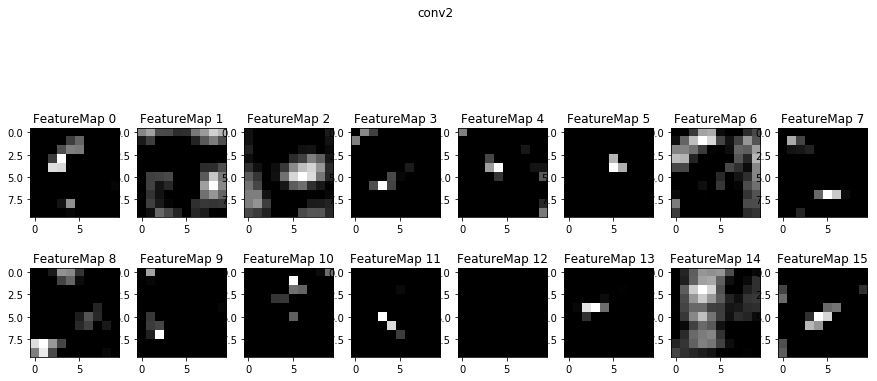

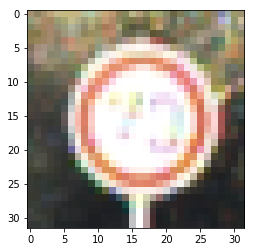

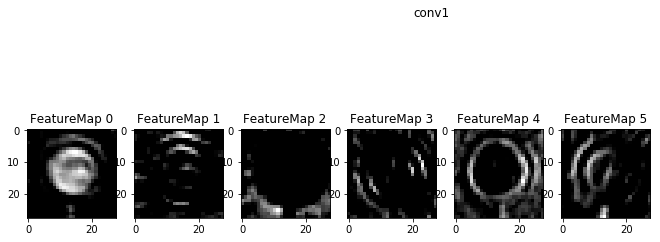

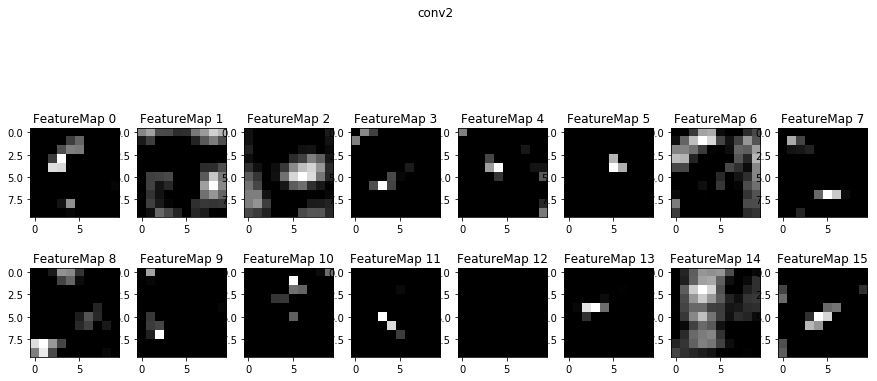

In [34]:
with tf.Session() as sess:
    saver.restore(sess, './' + MODEL_NAME)
    for i in range(len(test_images_normalized)):
        plt.imshow(test_images[i])
        plt.show()
        outputFeatureMap(np.array(test_images_normalized[i:]), conv1, 'conv1')
        outputFeatureMap(np.array(test_images_normalized[:]), conv2, 'conv2')